# Generate AIRS datset in NxN pixel tiles:
## (Needs original AIRS dataset, available in www.airs-dataset.com)

In [1]:
from pathlib import Path

DATASET_PATH = Path('F:/datasets/airs/')

TRAIN_PATH = DATASET_PATH / 'trainval/train'
VAL_PATH = DATASET_PATH / 'trainval/val'

TEST_PATH = DATASET_PATH / 'test'

TILES_IMG_TRAIN_PATH = TRAIN_PATH / 'tiles_img'
TILES_LABEL_TRAIN_PATH = TRAIN_PATH / 'tiles_label'
TILES_IMG_VAL_PATH = VAL_PATH / 'tiles_img'
TILES_LABEL_VAL_PATH = VAL_PATH / 'tiles_label'
TILES_IMG_TEST_PATH = TEST_PATH / 'tiles_img'
TILES_LABEL_TEST_PATH = TEST_PATH / 'tiles_label'

TILES_IMG_TRAIN_PATH.mkdir(parents=True, exist_ok=True)
TILES_LABEL_TRAIN_PATH.mkdir(parents=True, exist_ok=True)
TILES_IMG_VAL_PATH.mkdir(parents=True, exist_ok=True)
TILES_LABEL_VAL_PATH.mkdir(parents=True, exist_ok=True)
TILES_IMG_TEST_PATH.mkdir(parents=True, exist_ok=True)
TILES_LABEL_TEST_PATH.mkdir(parents=True, exist_ok=True)

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tqdm

%matplotlib inline

In [3]:
img = cv2.imread(str(TRAIN_PATH / 'image/christchurch_11.tif'))

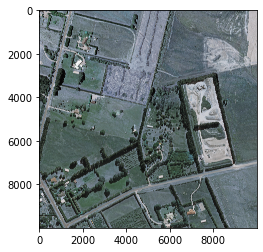

In [4]:
plt.imshow(img)

In [5]:
img.shape

(10000, 10000, 3)

#### Specify tile size, in this case 512x512

In [6]:
height, width, dim = img.shape

tile_size = 512

tiles = []

for h in range(0,height,tile_size):
    for w in range(0,width,tile_size):
        i = img[h:h+tile_size,w:w+tile_size]
        i = np.pad(i, ((0, tile_size - i.shape[0]), (0, tile_size - i.shape[1]), (0, 0)),
                   mode='constant', constant_values=3)
        
        tiles.append(i)

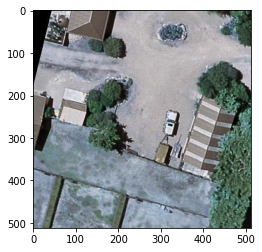

In [7]:
plt.imshow(tiles[0])

In [11]:
TILE_SIZE = 512

for file in tqdm.tqdm((TRAIN_PATH).glob('image/*.tif')):
    img = cv2.imread(str(file))
    label = cv2.imread(str(TRAIN_PATH / 'label' / file.name))
    
    # there is at least a rooftop in the image
    if label.any():
        height, width, dim = img.shape

        tile_size = TILE_SIZE

        for h in range(0,height,tile_size):
            for w in range(0,width,tile_size):
                i = img[h:h+tile_size,w:w+tile_size]
                i = np.pad(i, ((0, tile_size - i.shape[0]), (0, tile_size - i.shape[1]), (0, 0)),
                           mode='constant', constant_values=0)
                
                l = label[h:h+tile_size,w:w+tile_size]
                l = np.pad(l, ((0, tile_size - l.shape[0]), (0, tile_size - l.shape[1]), (0, 0)),
                           mode='constant', constant_values=0)
                
                # there is at least a rooftop in the tile
                if (i.any() and l.any()):
                    cv2.imwrite(str(TILES_IMG_TRAIN_PATH / ('{0}_{1}_{2}.png').format(file.name, h, w)), i)
                    cv2.imwrite(str(TILES_LABEL_TRAIN_PATH / ('{0}_{1}_{2}.png').format(file.name, h, w)), l)
                    cv2.imwrite(str(TILES_LABEL_TRAIN_PATH / ('{0}_{1}_{2}_viz.png').format(file.name, h, w)), l*255)

857it [5:52:21, 24.67s/it] 


In [9]:
TILE_SIZE = 512

for file in tqdm.tqdm((VAL_PATH).glob('image/*.tif')):
    img = cv2.imread(str(file))
    label = cv2.imread(str(VAL_PATH / 'label' / file.name))
    
    # there is at least a rooftop in the image
    if label.any():
        height, width, dim = img.shape

        tile_size = TILE_SIZE

        for h in range(0,height,tile_size):
            for w in range(0,width,tile_size):
                i = img[h:h+tile_size,w:w+tile_size]
                i = np.pad(i, ((0, tile_size - i.shape[0]), (0, tile_size - i.shape[1]), (0, 0)),
                           mode='constant', constant_values=0)
                
                l = label[h:h+tile_size,w:w+tile_size]
                l = np.pad(l, ((0, tile_size - l.shape[0]), (0, tile_size - l.shape[1]), (0, 0)),
                           mode='constant', constant_values=0)
                
                # there is at least a rooftop in the tile
                if (i.any() and l.any()):
                    cv2.imwrite(str(TILES_IMG_VAL_PATH / ('{0}_{1}_{2}.png').format(file.name, h, w)), i)
                    cv2.imwrite(str(TILES_LABEL_VAL_PATH / ('{0}_{1}_{2}.png').format(file.name, h, w)), l)
                    cv2.imwrite(str(TILES_LABEL_VAL_PATH / ('{0}_{1}_{2}_viz.png').format(file.name, h, w)), l*255)

94it [13:55,  8.89s/it]


In [10]:
TILE_SIZE = 512

for file in tqdm.tqdm((TEST_PATH).glob('image/*.tif')):
    img = cv2.imread(str(file))
    label = cv2.imread(str(TEST_PATH / 'label' / file.name))
    
    # there is at least a rooftop in the image
    if label.any():
        height, width, dim = img.shape

        tile_size = TILE_SIZE

        for h in range(0,height,tile_size):
            for w in range(0,width,tile_size):
                i = img[h:h+tile_size,w:w+tile_size]
                i = np.pad(i, ((0, tile_size - i.shape[0]), (0, tile_size - i.shape[1]), (0, 0)),
                           mode='constant', constant_values=0)
                
                l = label[h:h+tile_size,w:w+tile_size]
                l = np.pad(l, ((0, tile_size - l.shape[0]), (0, tile_size - l.shape[1]), (0, 0)),
                           mode='constant', constant_values=0)
                
                # there is at least a rooftop in the tile
                if (i.any() and l.any()):
                    cv2.imwrite(str(TILES_IMG_TEST_PATH / ('{0}_{1}_{2}.png').format(file.name, h, w)), i)
                    cv2.imwrite(str(TILES_LABEL_TEST_PATH / ('{0}_{1}_{2}.png').format(file.name, h, w)), l)
                    cv2.imwrite(str(TILES_LABEL_TEST_PATH / ('{0}_{1}_{2}_viz.png').format(file.name, h, w)), l*255)

95it [14:00,  8.84s/it]
